In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import pickle

data = {}
data['Normal TF'] = pickle.load(open('predictions/Boulder-sparse-normal-cv.pkl','r'))
#data['Normal MF'] = pickle.load(open('predictions/mf-baseline-normal.pkl','r'))

data['Transfer TF'] = pickle.load(open('predictions/SanDiego-Boulder-sparse-transfer-cv.pkl','r'))

#data['Transfer L21'] = pickle.load(open('predictions/transfer-sparse-static-normalised.pkl','r'))
#data['Transfer L1'] = pickle.load(open('predictions/transfer-sparse-static-normalised.pkl','r'))

#data['Joint'] = pickle.load(open('predictions/global-sparse-static-normalised.pkl','r'))
#data['Joint'] = pickle.load(open('predictions/joint-without-static-normalised.pkl','r'))

In [3]:
from common import APPLIANCES_ORDER, contri

In [4]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}
from plot_functions import *

In [5]:
none_transfer = pd.DataFrame(data['Transfer TF']['None'][0]).T
none_normal = pd.DataFrame(data['Normal TF']['None'][0]).T
static_normal = pd.DataFrame(data['Normal TF']['static'][0]).T
static_transfer = pd.DataFrame(data['Transfer TF']['static'][0]).T
#none_mf_normal = pd.DataFrame(data['Normal MF']['energy']).loc[range(10, 100, 20)]
#static_mf_normal = pd.DataFrame(data['Normal MF']['energy_static']).loc[range(10, 100, 20)]

In [6]:
d_overall = {            ('Transfer','TF','W/O Static'):none_transfer, 
                 ('Transfer','TF','W/ Static'):static_transfer,
                 ('Normal','TF','W/O Static'):none_normal,
                 ('Normal','TF','W/ Static'):static_normal,
                 #('Normal','MF','W/ Static'):static_mf_normal,
                 #('Normal','MF','W/O Static'):none_mf_normal,
            
                }

d_res = {            ('Transfer','TF','W/O Static'):none_transfer, 
                 ('Transfer','TF','W/ Static'):static_transfer,
                 ('Normal','TF','W/O Static'):none_normal,
                 
            
                }


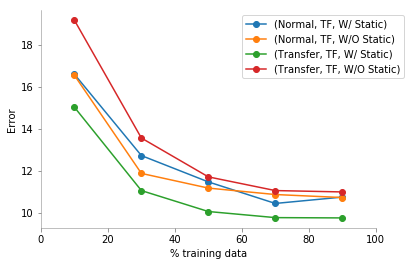

In [7]:
overall_res = {}
for name, df in d_overall.iteritems():
    overall_res[name] = (df*pd.Series(contri['Austin'])).sum(axis=1)
pd.DataFrame(overall_res).plot(marker='o')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.ylabel("Error")
plt.xlim((0, 100))
plt.xlabel("% training data")
format_axes(plt.gca())


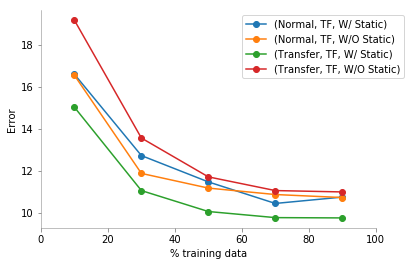

In [9]:
overall_res = {}
for name, df in d_overall.iteritems():
    overall_res[name] = (df*pd.Series(contri['Austin'])).sum(axis=1)
pd.DataFrame(overall_res).plot(marker='o')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.ylabel("Error")
plt.xlim((0, 100))
plt.xlabel("% training data")
format_axes(plt.gca())


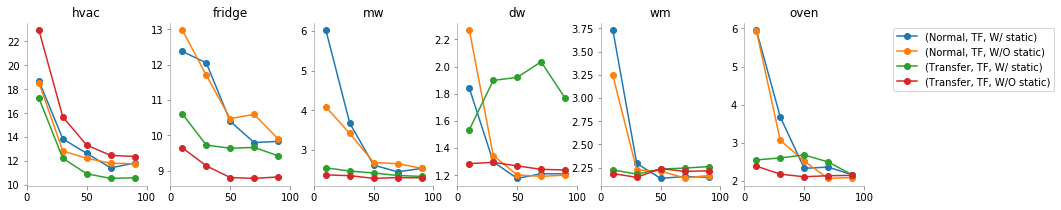

In [8]:
fig, ax = plt.subplots(ncols=6, figsize=(15, 3))
for col, appliance in enumerate(APPLIANCES_ORDER[1:]):
    static_normal[appliance].plot(ax=ax[col], marker='o', label=('Normal','TF','W/ static'), title=appliance)
    none_normal[appliance].plot(ax=ax[col], marker='o', label=('Normal','TF','W/O static'), title=appliance)
    static_transfer[appliance].plot(ax=ax[col], marker='o', label=('Transfer','TF','W/ static'))
    none_transfer[appliance].plot(ax=ax[col], marker='o', label=('Transfer','TF','W/O static'))
    
    
    #static_mf_normal[appliance].plot(ax=ax[col], marker='o', label=('Normal','MF','W/ static'), title=appliance)
    
    ax[col].set_xlim((0, 100))
    format_axes(ax[col])
plt.legend(bbox_to_anchor=(1.2, 1))
    
    
    

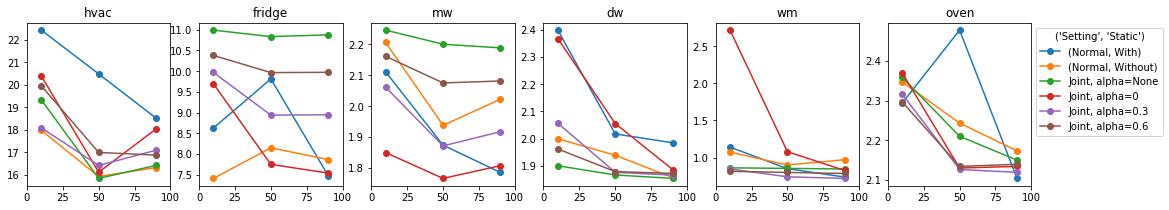

In [16]:
fig, ax = plt.subplots(figsize=(18, 3), ncols=6)
#for setting in ['Normal','Transfer L21', 'Transfer L1','Joint']:

setting, static = 'Normal','With'
df = pd.Panel(data[setting]['static'][best_params[setting][static]][2]).mean(axis=0)
for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
    df[appliance].plot(ax=ax[i], title=appliance, label=(setting, static), marker='o')
    ax[i].set_xlim((0, 100))

setting, static = 'Normal','Without'
df = pd.Panel(data[setting][None][best_params[setting][static]][2]).mean(axis=0)
for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
    df[appliance].plot(ax=ax[i], title=appliance, label=(setting, static), marker='o')
    ax[i].set_xlim((0, 100))

res = {}
for alpha in [None, 0, 0.3, 0.6]:
    res[alpha] = pd.Panel(data['Joint'][None][alpha][2]).mean(axis=0)
    for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
        res[alpha][appliance].plot(ax=ax[i], marker='o', title=appliance, label='Joint, alpha={}'.format(alpha))
        ax[i].set_xlim((0, 100))
    
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))

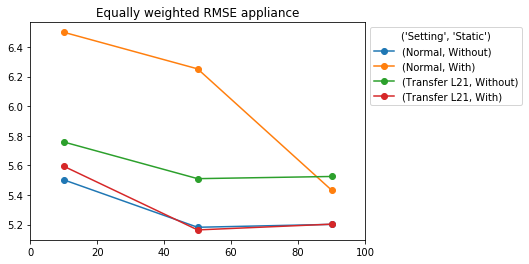

In [17]:

for setting in ['Normal','Transfer L21']:
#for setting in ['Transfer L21', 'Transfer L1', 'Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        
        df.mean(axis=1).plot( label=(setting, static), marker='o')
plt.xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))
plt.title("Equally weighted RMSE appliance")

In [34]:
['{}_{}'.format(appliance, month) for month in range(1, 13)]

['hvac_1',
 'hvac_2',
 'hvac_3',
 'hvac_4',
 'hvac_5',
 'hvac_6',
 'hvac_7',
 'hvac_8',
 'hvac_9',
 'hvac_10',
 'hvac_11',
 'hvac_12']

In [44]:
r_df = create_matrix_single_region('SanDiego', 2014)[0]
contri = {}
for appliance in APPLIANCES_ORDER[1:]:
    df_app = r_df[['{}_{}'.format(appliance, month) for month in range(5, 11)]]
    df_agg = r_df[['{}_{}'.format("aggregate", month) for month in range(5, 11)]]
    df_app.columns = df_agg.columns
    contri[appliance] = df_app.div(df_agg).mean().mean()

In [50]:
error_weights = pd.Series(contri).div(pd.Series(contri).sum()).to_dict()


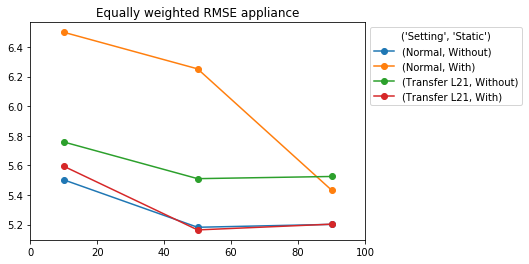

In [51]:

for setting in ['Normal','Transfer L21']:
#for setting in ['Transfer L21', 'Transfer L1', 'Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        
        df.mean(axis=1).plot( label=(setting, static), marker='o')
plt.xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))
plt.title("Equally weighted RMSE appliance")

10    2.126304
50    1.904050
90    1.935567
dtype: float64

In [54]:
pd.DataFrame({'a':[1, 3], 'b':[5, 4]})*pd.DataFrame({'a':[1, 3], 'b':[5, 4]})

,a,b
0,1,25
1,9,16


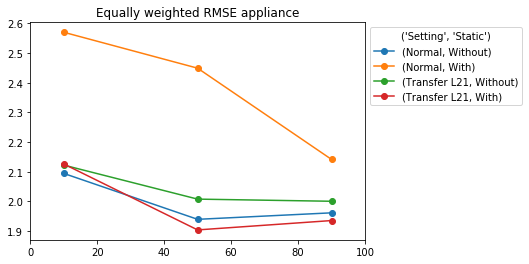

In [60]:

for setting in ['Normal','Transfer L21']:
#for setting in ['Transfer L21', 'Transfer L1', 'Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        
        (pd.DataFrame(error_weights, index=[10, 50, 90])*df).mean(axis=1).plot( label=(setting, static), marker='o')
plt.xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))
plt.title("Equally weighted RMSE appliance")

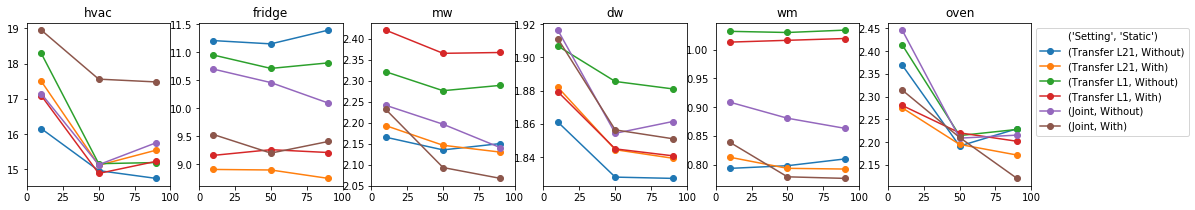

In [11]:
fig, ax = plt.subplots(figsize=(18, 3), ncols=6)
#for setting in ['Normal','Transfer L21', 'Transfer L1','Joint']:
for setting in ['Transfer L21', 'Transfer L1', 'Joint']:
    for static in ['Without', 'With']:
        if static=='Without':
            static_param = None
        else:
            static_param = 'static'
        df = pd.Panel(data[setting][static_param][best_params[setting][static]][2]).mean(axis=0)
        for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
            df[appliance].plot(ax=ax[i], title=appliance, label=(setting, static), marker='o')
            ax[i].set_xlim((0, 100))
plt.legend(bbox_to_anchor=(1,1), title=('Setting', 'Static'))

In [ ]:
pd.Panel(data['Normal']['static'][best_params['Normal']['With']][2]).mean(axis=0)

In [48]:
pd.Panel(data['Normal'][None][best_params['Normal']['With']][2]).mean(axis=0)

,dw,fridge,hvac,mw,oven,wm
10,2.102761,7.859291,19.301613,2.100703,2.441842,1.032927
50,1.984041,7.444513,16.676890,1.820663,2.226688,0.739819
90,1.932113,6.806438,16.303977,1.676773,2.116843,0.711745
